Please enter the name of the subfolder with the data file: data

Plot1: ratings by age group
How many of the 118 movies would you like to consider? 5
Select 5 movies

Enter movie keyword: game
Which of the following movies would you like to pick (enter number)
        1 The Imitation Game
        2 The Hunger Games: Catching Fire
Enter a number: 2
Movie #1: 'The Hunger Games: Catching Fire'

Enter movie keyword: girl
Which of the following movies would you like to pick (enter number)
        1 Me and Earl and the Dying Girl
        2 The Girl with the Dragon Tattoo
        3 Gone Girl
Enter a number: 3
Movie #2: 'Gone Girl'

Enter movie keyword: girl
Which of the following movies would you like to pick (enter number)
        1 Me and Earl and the Dying Girl
        2 The Girl with the Dragon Tattoo
        3 Gone Girl
Enter a number: 1
Movie #3: 'Me and Earl and the Dying Girl'

Enter movie keyword: game
Which of the following movies would you like to pick (enter number)
        1 The 

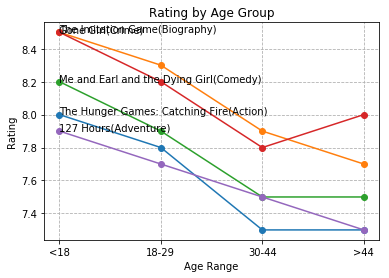

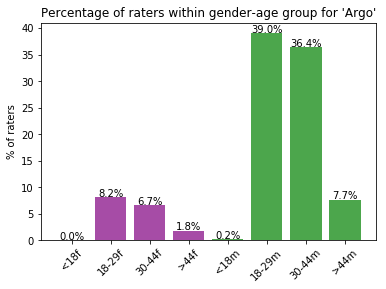

In [2]:
'''
Created on Dec 09, 2018

This program is used to create visualizations of the movie data
'''

import pandas as pd
import matplotlib.pyplot as plt
import os

def main():
    FILES = "IMDB.csv"
    fileLoc = input("Please enter the name of the subfolder with the data file: ")
    
    cur_path = os.getcwd()
    target_path = os.path.join(cur_path, fileLoc)
    moviePath = os.path.join(target_path, FILES)
    moviesData = pd.read_csv(moviePath)
    titleData = moviesData['Title']
    
    plot1List = pickMovieWithKeyword(titleData)
    plot2Movie = pickMovieforPlot2(titleData)
    
    print('-' * 100)
    plot1(plot1List, moviesData)
    plot2(plot2Movie, moviesData)
    
    
def pickMovieWithKeyword(titleData):
    # This function is used to let the user pick a specific number of movies chosen by the user and search by a keyword
    
    print('\nPlot1: ratings by age group')
    movieNum = int(input('How many of the 118 movies would you like to consider? '))
    print('Select', movieNum, 'movies\n')
    
    titles = set(line.strip() for line in titleData)
    plot1List = []
      
    for i in range(0, movieNum):
        movieList = []
        movieName = {}
        keyword = input('Enter movie keyword: ')
        
        while (str(titleData).upper()).find(keyword.upper()) == -1: # check if the keyword is valid
            keyword = input('Enter movie keyword: ')
            
        else:  
            for line in titles:
                if keyword.upper() in line.upper():
                    movieList.append(line)

            if len(movieList) != 1: # check if the keyword matches only one movie and ask the user to pick one
                print('Which of the following movies would you like to pick (enter number)')
                
                for n, name in enumerate(movieList, 1):
                    movieName[n] = name
                    print("       ", n, name)
                    
                pickedNum = int(input('Enter a number: '))
                pickedMovie = movieName[pickedNum]
                plot1List.append(pickedMovie)
                       
                print('Movie #' + str(i + 1) + ": '"+ pickedMovie + "'\n")
                
            else: # check if the keyword matches only one movie
                pickedMovie = movieList[0]
                plot1List.append(pickedMovie)
                print('Movie #' + str(i + 1) + ": '" + pickedMovie + "'\n")

    return plot1List


                
def plot1(plot1lst, movies):
    

    #get the movie in the list that the pickmoviewithkeyword function greate title genre1 and age group 
    for i in range(len(plot1lst)): 
        columnname =['Title','Genre1','VotesU18','Votes1829','Votes3044','Votes45A' ]
        movies = movies[columnname]
        portion = movies[movies['Title'] == plot1lst[i]] 
        #when convert to string, the index also shows, we only need the genre
        genre = str(portion.loc[:, 'Genre1']).split()[1]
      ## set the x axis 
#         plt.subplot(121)
        plt.plot(['<18', '18-29', '30-44', '>44'], 
                [float(portion['VotesU18']), float(portion['Votes1829']), float(portion['Votes3044']), float(portion['Votes45A'])],
                marker = 'o')
        ## set the annotation
        plt.annotate((plot1lst[i] + '(' + genre + ')'), ('<18', float(portion['VotesU18'])))
    ## set the lable     


    plt.xlabel ('Age Range')
    plt.ylabel('Rating')
    plt.title('Rating by Age Group')
    
    
    ## get the backgroud with --dashline
    plt.grid(ls = '--')
    ## save the plot 
    plt.savefig("plot1.jpg")
    plt.show()

def pickMovieforPlot2(titleData):
    # This function is used to let the user pick one single movie by a keyword

    print('\nPlot2: Percentage of raters within gender-age. Select a movie: \n')
    
    titles = set(line.strip() for line in titleData)
      
    keyword = input('Enter movie keyword: ')
    movieList = []
    movieName = {}
        
    while (str(titleData).upper()).find(keyword.upper()) == -1: # check if the keyword is valid
        keyword = input('Enter movie keyword: ')
            
    else:  
        for line in titles:
            if keyword.upper() in line.upper():
                movieList.append(line)

        if len(movieList) != 1: # check if the keyword matches only one movie and ask the user to pick one
            print('Which of the following movies would you like to pick (enter number)')
                
            for n, name in enumerate(movieList, 1):
                movieName[n] = name
                print("       ", n, name)
                    
            pickedNum = int(input('Enter a number: '))
            plot2Movie = movieName[pickedNum]
                       
            print("Movie # 1: '" + plot2Movie + "'")
                
        else: # check if the keyword matches only one movie
            plot2Movie = movieList[0]
            print("Movie # 1: '" + plot2Movie + "'")
        
    return plot2Movie    
 
def plot2(plot2Movie, moviesData):
    # raw a plot of Percentage of raters within gender-age group for the movie chosen by the user
#     plt.subplot(122)
    columnname = ['Title','CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF', 'CVotesU18M','CVotes1829M',
           'CVotes3044M','CVotes45AM']
    moviesData = moviesData[columnname]
    moviesData = moviesData[moviesData['Title'] == plot2Movie]
    votesData = moviesData.values.tolist()[0][1:]
    
    totalVotes = sum(votesData)
    rateList = []
    
    for i in range(len(votesData)):
        rate = (votesData[i] / totalVotes) * 100
        rateList.append(rate)
    rateF = rateList[0:4]
    rateM = rateList[4:8]    
    label = ['<18f', '18-29f', '30-44f', '>44f', '<18m', '18-29m', '30-44m', '>44m']
    
    
    
    for i in range(4):
#         plt.subplot(122)
        plt.bar(i,rateF[i],color='purple', alpha = 0.7)  
        plt.text(i, rateF[i] +0.7, '%.1f' % rateF[i] + '%', 
                 horizontalalignment='center',verticalalignment='center',
                 fontsize=10)
        plt.bar(i+len(rateF),rateM[i],color='green', alpha = 0.7)
        plt.text(i+len(rateF), rateM[i] +0.7, '%.1f' % rateM[i] + '%', 
                 horizontalalignment='center',verticalalignment='center',
                 fontsize=10)
        
    plt.xticks([index for index in range(len(rateList))], label, rotation = 45) # change the name of x tick and rotate it
    plt.ylabel('% of raters')
    plt.title("Percentage of raters within gender-age group for '" + plot2Movie + "'")
    
    
    plt.savefig("plot2.jpg")
    plt.show() 
#     print("votesdata",votesData )
#     print("ratelist", rateList)
#     print(rateF)
#     print(rateM)
#     print(plot2Movie)
  
main()   
